# EDA+Prophet+ MLP Neural Network Forecasting

**Arindam Dutta**

22-09-2018 (Version-8)

# Before we begin: 

I would like to take the opportunity to appreciate the help of  Corey Levinson,Kirill Tsyganov, Alexey Kozionov, Alexander Andreev, Jaroslav Bologov, Nurlan Shagadatov & Makarychev Sergey**.

If you liked my work, then please don't forget to  upvote the Tutorial since it will keep me motivating to perform more in-depth reserach Forecasting Method.I hope you will enjoy our deep exploration into this dataset. Suggestions on improvements are welcome.

Let the Forecasting begin. :)

# Executive Summary:

This tutorial consists of comprehensive Exploratory Data Analysis with Prophet and MLP Neural Network Forecast Modeling for [Store Item Demand Forecasting Challenge](https://www.kaggle.com/c/demand-forecasting-kernels-only) competition.
    The objective of the problem is to forecast 3 months of sales  for 50 different items at 10 different stores using the 5 years history of sales.
    
The [data](https://www.kaggle.com/c/demand-forecasting-kernels-only/data) contains the following files:

1. **train.csv :** the training data witht the history of sales.

2. ** test.csv: **the test data to predict the sales.

3. **Sample submission.csv: **Sample submission file


**Data fields**

date - Date of the sale data. There are no holiday effects or store closures.

store - Store ID

item - Item ID

sales - Number of items sold at a particular store on a particular date.

 # Introduction:
Time series forecasting is a skill that few people claim to know. Machine learning is cool. And there are a lot of people interested in becoming a machine learning expert. But forecasting is something that is a little domain specific. 

Retailers like **Walmart, Target** use forecasting systems and tools to replenish their products in the stores. An excellent forecast system helps in winning the other pipelines of the supply chain. If you are good at predicting the sale of items in the store, you can plan your inventory count well. You can plan your assortment well.

A good forecast leads to a series of wins in the other pipelines in the supply chain. 

# What is time series?
A time series is a sequence of observations collected at some time intervals. Time plays an important role here. The observations collected are dependent on the time at which it is collected.

The sale of an item say **bread** in a retail store like Walmart will be a time series. The sale could be at daily level or hourly level. The number of people flying from NewYork to Spain on daily basis is a time series. Time is important here. During Christmas holidays, this number would be humongous compared to the other days. This is know as **seasonality**. 

# What is the difference between a time series and a normal series?
Time component is important here. The time series is dependent on the time. However a normal series say 1, 2, 3...100 has no time component to it. When the value that a series will take depends on the time it was recorded, it is a time series. 

# How to define a time series object in R
ts() function is used for equally spaced time series data, it can be at any level. Daily, weekly, monthly, quarterly, yearly or even at minutes level. If you wish to use unequally spaced observations then you will have to use other packages. 

ts() is used for numerical observations and you can set frequency of the data. ts() takes a single frequency argument. There are times when there will be multiple frequencies in a time series. We use msts() multiple seasonality time series in such cases. I will talk about msts() in later part of the post. For now, let us define what is frequency. 

# Frequency
When setting the frequency, many people are confused what should be the correct value. This is the simple definition of frequency. Frequency is the number of observations per cycle. Now, how you define what a cycle is for a time series? 

Say, you have electricity consumption at Bangalore at hourly level. The cycle could be a day, a week or even annual. I will cover what frequency would be for all different type of time series. 

Before we proceed I will reiterate this.

**Frequency is the number of observations per cycle.**

We will see what values frequency takes for different interval time series. 

**Daily data **  There could be a weekly cycle or annual cycle. So the frequency could be 7 or 365.25.

Some of the years have 366 days (leap years). So if your time series data has longer periods, it is better to use frequency = 365.25. This takes care of the leap year as well which may come in your data. 

**Weekly data** There could be an annual cycle. frequency = 52 and if you want to take care of leap years then use frequency = 365.25/7 

**Monthly data** Cycle is of one year. So frequency = 12 

**Quarterly data** Again cycle is of one year. So frequency = 4 

**Yearly data** Frequency = 1 

There could be smaller interval freuqncy as well like **Hourly, Half-Hourly, Mintues, Seconds** time series data as well


# Table of Contents

## 1. [Load Libraries](#section1)
## 2. [Load Data  & Structure of the Data](#section2)
## 3. [Missing Values Detection](#section3)
## 4. [Individual feature visualisations](#section4)
>## 4. 1.[Histogram of Sale Price](#section4.1) 
>## 4.2.[Growth by date](#section4.2) 
>## 4.3.[Growth by Month of Different Year](#section4.3) 
>## 4.4.[Growth by Year](#section4.4) 
>## 4.5.[Growth By Store](#section4.5) 
>## 4.6.[ Yearly Growth By Item](#section4.6) 
  
 
  
## 5. [PART 1-What is the Prophet model?](#section5)
>## 5. 1.[Background](#section5.1) 
>## 5.2.[Advantages over other Time Series Models](#section5.2) 
>## 5.3.[Modeling Framework & Theory](#section5.3) 
> ## 5.4.[Model building using PROPHET: store= 1, Product_ID=1](#section5.4) 
>## 5.5.[Customizing holidays and events](#section5.5) 
> ## 5.6.[IncludeFourier Order of Seasonality &  Additional Regressors](#section5.6) 
> ## 5.7.[ Including Additional Regressors e.g. NFL Sundays](#section5.7) 
> ## 5.8.[SMAPE Calculation](#section5.8) 
 >## 5.9.[Automation for Prophet: Splitting data by Store and Item](#section5.9) 
 > ## 5.10.[Final Prediction using Prophet](#section5.10) 
 > ## 5.11.[How to Improve Propehet Model Further](#section5.11) 
  


## 6.[PART 2: Forecasting Time Series with Neural Networks](#section6)
>  ## 6. 1.[Background](#section6.1) 
>  ## 6.2.[Baseline Predcition with 1 Hidden Layer](#section6.2) 
>  ## 6.3.[Plotting the Forecast & Calculate the MSE (Mean Squared Error)](#section6.3) 
>  ## 6.4.[Shifting Input](#section6.4) 
>  ## 6.5.[Outplot & Model Fitting](#section6.5) 



## 7. [Extensions](#section7)
>Choosing Oprimal No of Hidden Layer based on min(MSE).

>Fitting ELM Feed Forward Network for forecasting.

>Temporal Hierarchies forecasting

>Automation based on MLP/ ELM NN Forecasting.



## 8. [References](#section8)

<a id="section1"></a>
# 1.LOAD LIBRARIES:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from prophet import Prophet
np.random.seed(2018)

 <a id="section2"></a>
 # 2. Load Data , Structure & Summary of the Data

In [11]:
import pandas as pd
from datetime import datetime
train = pd.read_csv("x_train.csv")
print("The train data set has {} rows and {} columns".format(train.shape[0], train.shape[1]))
print(train.info())
test = pd.read_csv("data/test.csv")
print("The test data set has {} rows and {} columns".format(test.shape[0], test.shape[1]))
print(test.info())
print("the summary of train sales is:")
print(train['sales'].describe())

# train['Year'] = pd.to_datetime(train['date']).dt.year
# train['Month'] = pd.to_datetime(train['date']).dt.to_period('M')
train


The train data set has 867499 rows and 10 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867499 entries, 0 to 867498
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        867499 non-null  int64  
 1   store             867499 non-null  int64  
 2   item              867499 non-null  int64  
 3   year              867499 non-null  float64
 4   day_of_week_sin   867499 non-null  float64
 5   day_of_week_cos   867499 non-null  float64
 6   month_sin         867499 non-null  float64
 7   month_cos         867499 non-null  float64
 8   week_of_year_sin  867499 non-null  float64
 9   week_of_year_cos  867499 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 66.2 MB
None
The test data set has 45000 rows and 4 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ---

KeyError: 'sales'

<a id="section3"></a>
# 3. Missing Values Detection:

In [ ]:

colSums(is.na(train))
# Function 1 : For ploting missing value
plot_missing <- function(data, title = NULL, ggtheme = theme_gray(), theme_config = list("legend.position" = c("bottom"))) {
  ## Declare variable first to pass R CMD check
  feature <- num_missing <- pct_missing <- group <- NULL
  ## Check if input is data.table
  is_data_table <- is.data.table(data)
  ## Detect input data class
  data_class <- class(data)
  ## Set data to data.table
  if (!is_data_table) data <- data.table(data)
  ## Extract missing value distribution
  missing_value <- data.table(
    "feature" = names(data),
    "num_missing" = sapply(data, function(x) {sum(is.na(x))})
  )
  missing_value[, feature := factor(feature, levels = feature[order(-rank(num_missing))])]
  missing_value[, pct_missing := num_missing / nrow(data)]
  missing_value[pct_missing < 0.05, group := "Good"]
  missing_value[pct_missing >= 0.05 & pct_missing < 0.4, group := "OK"]
  missing_value[pct_missing >= 0.4 & pct_missing < 0.8, group := "Bad"]
  missing_value[pct_missing >= 0.8, group := "Remove"][]
  ## Set data class back to original
  if (!is_data_table) class(missing_value) <- data_class
  ## Create ggplot object
  output <- ggplot(missing_value, aes_string(x = "feature", y = "num_missing", fill = "group")) +
    geom_bar(stat = "identity") +
    geom_text(aes(label = paste0(round(100 * pct_missing, 2), "%"))) +
    scale_fill_manual("Group", values = c("Good" = "#1a9641", "OK" = "#a6d96a", "Bad" = "#fdae61", "Remove" = "#d7191c"), breaks = c("Good", "OK", "Bad", "Remove")) +
    scale_y_continuous(labels = comma) +
    coord_flip() +
    xlab("Features") + ylab("Number of missing rows") +
    ggtitle(title) +
    ggtheme + theme_linedraw()+
    do.call(theme, theme_config)
  ## Print plot
  print(output)
  ## Set return object
  return(invisible(missing_value))
}
plot_missing(train)

> **Therefore there is NO MISSING VALUES in our data**

<a id="section4"></a>
# 4. Individual feature visualisations:

<a id="section4.1"></a>
# 4.1. Histogram of Sale Price

In [ ]:
gbp1<-wes_palette("GrandBudapest2")[1]

ggplot(train, aes(x=sales))+
  geom_histogram(fill="#a6d96a", alpha=.9)+
  labs(x=NULL, y=NULL, title = "Histogram of Sale Price")+
  # scale_x_continuous(breaks= seq(0,600000, by=100000))+
  theme_minimal() + theme(plot.title=element_text(vjust=3, size=15) )

**Therefore our Sales Price follows Positively Skewed Distribution.**

> **Let's check the Growth & Growth Rate by Date****

<a id="section4.2"></a>
# 4.2.Growth by date

In [ ]:
MSP <- aggregate(sales ~date, train, mean)
# MSP <-na.omit(ddply(data, 'date', summarise, mean(Sale_Prices, na.rm=T)))

sl1 <-ggplot(MSP, aes(x=as.factor(date), y=sales))+
  geom_line(color=gbp1, aes(group=1), size=1.5)+
  geom_point(colour=gbp1, size = 3.5, alpha=0.5)+
  labs(title="The Growth of Sale Prices by date", x=NULL, y="Sale Price")+
  theme( plot.title=element_text(vjust=3, size=15) ) + theme_minimal()

MSP$rate = c(0, 100*diff(MSP$sales)/MSP[-nrow(MSP),]$sales)

sl2 <-ggplot(MSP, aes(x=as.factor(date), y=rate))+
  geom_line(color= "gray50", aes(group=1), size=1)+
  #geom_point(colour=gbp1, size = 3.5, alpha=0.5)+
  labs(title="Change rate of Sale Price", x="date", y="rate of change")+
  geom_hline(yintercept = 0, color = gbp1 )+
  theme(plot.title=element_text(size=15))+ theme_minimal()

grid.arrange(sl1,sl2)


1. *The Growth of the Sales Price are Multiplicative with incresing TREND and SEASONALITY.*

2.* The Change in Rate of Sales Price is looking constant by Date. But is the Growth Rate Change TRUE at Yearly / Monthly Level. Lets check it out*

**########### Let's check the Growth of Sales Price by Month of different Year #################**

<a id="section4.3"></a>
# 4.3. Growth by Month of Different Year

In [ ]:

MSP <- aggregate(sales ~Month, train, mean)
# MSP <-na.omit(ddply(data, 'date', summarise, mean(Sale_Prices, na.rm=T)))

sl1 <-ggplot(MSP, aes(x=as.factor(Month), y=sales))+
  geom_line(color=gbp1, aes(group=1), size=1.5)+
  geom_point(colour=gbp1, size = 3.5, alpha=0.5)+
  labs(title="The Growth of Sale Prices by Month of Year", x=NULL, y="Sale Price")+
  theme( plot.title=element_text(vjust=3, size=15) ) + theme_minimal()

MSP$rate = c(0, 100*diff(MSP$sales)/MSP[-nrow(MSP),]$sales)

sl2 <-ggplot(MSP, aes(x=as.factor(Month), y=rate))+
  geom_line(color= "gray50", aes(group=1), size=1)+
  #geom_point(colour=gbp1, size = 3.5, alpha=0.5)+
  labs(title="Change rate of Sale Price", x="Month", y="rate of change")+
  geom_hline(yintercept = 0, color = gbp1 )+
  theme(plot.title=element_text(size=15))+ theme_minimal()

grid.arrange(sl1,sl2)


** Therefore, our assumption is quite TRUE that the sales prices are multiplicative with increasing TREND & SEASONALITY.
** 

**But there is a change in scenario for the monthly rate of change of sales price. The rate is almost constant at daily level. But it is highly fluctuating at monthly Level.**

<a id="section4.4"></a>
# 4.4. Growth by Year

In [ ]:
MSP <- aggregate(sales ~Year, train, mean)
# MSP <-na.omit(ddply(data, 'date', summarise, mean(Sale_Prices, na.rm=T)))

sl1 <-ggplot(MSP, aes(x=as.factor(Year), y=sales))+
  geom_line(color=gbp1, aes(group=1), size=1.5)+
  geom_point(colour=gbp1, size = 3.5, alpha=0.5)+
  labs(title="The Growth of Sale Prices by Year", x=NULL, y="Sale Price")+
  theme( plot.title=element_text(vjust=3, size=15) ) + theme_minimal()

MSP$rate = c(0, 100*diff(MSP$sales)/MSP[-nrow(MSP),]$sales)

sl2 <-ggplot(MSP, aes(x=as.factor(Year), y=rate))+
  geom_line(color= "gray50", aes(group=1), size=1)+
  #geom_point(colour=gbp1, size = 3.5, alpha=0.5)+
  labs(title="Change rate of Sale Price", x="Year", y="rate of change")+
  geom_hline(yintercept = 0, color = gbp1 )+
  theme(plot.title=element_text(size=15))+ theme_minimal()

grid.arrange(sl1,sl2)

 1.The Growth of Sales Price is increasing at Yearly  level.
 
 2.But there is a change in scenario for Rate of Change of Sales Price by Year.
 
 3.From 2013 to 2014 the rate has monotonically increased, after thaat there is a drop in rate till 2015. 
 
 4.ALthough the rate increased upto 2016, but the highest incre occur in 2014.
 
 5.Therefore we can expect that in 2018 the rate of change of sales will increse if it follows the simililar pattern.
 

<a id="section4.5"></a>
# 4.5 Growth By Store

In [ ]:
unique(train$store)
Year_state<-aggregate(sales ~store+Year, train,mean)
pal<-rep(brewer.pal(10, "BrBG"),5)

ggplot(Year_state, aes(group = store ))+
  geom_line(aes(x=Year,y=sales,color=store), alpha=0.5, show.legend=F)+
  labs(title="The Growth of Sales Price by Store from 2013 - 2017", x=NULL
  )+
  theme(panel.background=element_rect(fill = "Black"),
        plot.title=element_text(vjust=3, size=15),
        panel.grid.major=element_line(color = pal))

**Therefore there are 10 unique stores(1-10) and the Store-3 has the highest Yearly Growth of Sales whereas Store-7 has the lowest.**

<a id="section4.6"></a>
# 4.6. Yearly Growth By Item

In [ ]:
unique(train$item)
Year_state<-aggregate(sales ~item+Year, train,mean)
pal<-rep(brewer.pal(10, "BrBG"),5)

ggplot(Year_state, aes(group = item ))+
  geom_line(aes(x=Year,y=sales,color=item), alpha=0.5, show.legend=F)+
  labs(title="The Growth of Sales Price by Store from 2013 - 2017", x=NULL
  )+
  theme(panel.background=element_rect(fill = "Black"),
        plot.title=element_text(vjust=3, size=15),
        panel.grid.major=element_line(color = pal))

**Therefore there are 50 unique stores(1-50) and the ITEM-17 has the highest Yearly Growth of Sales whereas Store-26 has the lowest.**

<a id="section5"></a>
# 5. What is the Prophet model?

<img src="https://raw.githubusercontent.com/uselessskills/auto_ml/master/Prophet_analysis/pngs/final_formula_new.png" width="100%">

Prophet model has 5 training parameters: 
- $k$ - base trend, 
- $m$ - offset parameter, 
- $\delta = \{\delta_i\}_{i = 0}^{\#changepoints}$ - changing of trend in changepoints, 
- $\beta = \{ \beta_i\}_{i = 0}^{Z}$ - parameters for Fourier series (seasonal component) and extra regressors (exogenous features), where $Z = 2 * \sum_{i: \text{seasonal-features}}\left(\text{Seasonal-order}(i) \right)+ \# \{\text{exogenous regressors}\}$, 
- $\sigma$ - level of noise,
- $mu_{\text{train}}$, $std_{\text{train}}$ - mean and std value, calculated for each the $i$-th regressor on train. 

Formula above doesn't take into account some detailes, for example that time is standartized.


  <a id="section5.1"></a>
  # 5.1. Background: 

**1. When you want to forecast the time series data in R, you typically would use a package called ‘forecast’, with which you can use models like ARIMA.
2. But then, beginning of 2017, a team at Facebook released ‘Prophet’, which utilizes a Bayesian based curve fitting method to forecast the time series data.
**

<a id="section5.2"></a>
# 5.2.Advantages over other Time Series Models:

**a.	The cool thing about Prophet is that it doesn’t require much prior knowledge or experience of forecasting time series data since it automatically finds seasonal trends beneath the data and offers a set of ‘easy to understand’ parameters.  Hence, it allows non-statisticians to start using it and get reasonably good results that are often equal or sometimes even better than the ones produced by the experts.**

**b.	Prophet modelling can be able to detect the Change Points in time series data.**

**c.	We can include the holidays (play-offs & super-bowls) in our data. Details has been added later.**

**d.	We can regularise the parameters by means of Bayesian oprimisation with cross-validation.**

**e.	We can incorporate the multiplicative-seasonality and determine the uncertainty intervals in the data.**

**f.	Additional regressors can be added to the linear part of the model using the add_regressor method or function. A column with the regressor value will need to be present in both the fitting and prediction data-frames.**



<a id="section5.3"></a>
# 5.3. Modeling Framework & Theory:

<img src="https://raw.githubusercontent.com/uselessskills/auto_ml/master/Prophet_analysis/pngs/stan.png" width="100%">

Where by $s_m$ and $s_a$ we denote coefficients (fourier coefficients and standartized regressor values) for multiplicative and additive terms respectively.

<img src="https://raw.githubusercontent.com/uselessskills/auto_ml/master/Prophet_analysis/pngs/changepoints_process.png" width="100%">
This image was taken from original Facebook Prophet documentation, see https://facebook.github.io/prophet/docs/trend_changepoints.html

<img src="https://raw.githubusercontent.com/uselessskills/auto_ml/master/Prophet_analysis/pngs/changepoints_prior_scale.png" width="100%">
This image was taken from original Facebook Prophet documentation, see https://facebook.github.io/prophet/docs/trend_changepoints.html

Parameter **changepoint_prior_scale** affects only in MCMC mode. 
Changepoint_prior_scale is used as initial parameter $\tau$ for prior for $delta$  ~ $Laplace(0, \tau)$. Stan optimization uses priors for optimization procedure, that obtains estimation on parameters. 

In the case when we set changepoint_prior_scale is equal to 0.5, we have more flexibility for prior for $\delta$ in opposite to changepoint_prior_scale=0.001 . And this will influence on estimation of this parameter. This effect we see on the plot.

<img src="https://raw.githubusercontent.com/uselessskills/auto_ml/master/Prophet_analysis/pngs/trend_middle.png" width="100%">

<img src="https://raw.githubusercontent.com/uselessskills/auto_ml/master/Prophet_analysis/pngs/multiplicative_terms_new.png" width="100%">

<img src="https://raw.githubusercontent.com/uselessskills/auto_ml/master/Prophet_analysis/pngs/additive_terms_new.png" width="100%">

Let us denote by $r_1$, $r_2$ standartized value for regressor $f_1$ anf $f_2$ respectively.
$\phi_{sin_Y}$, $\phi_{cos_Y}$ denotes the fourier coefficient for yearly seasonal component.
$\phi_{sin_M}$, $\phi_{cos_M}$ denotes the fourier coefficient for monthly seasonal component.

- **Then the multiplicative term in this case will be just $\phi_{sin_Y} * \beta_{0} + \phi_{cos_Y} * \beta_{1}$ + $\phi_{sin_M} * \beta_{2} + \phi_{cos_M} * \beta_{3} + r_1 * \beta_4$**

- **And additive will be $r_2 \beta_5$**

<img src="https://github.com/uselessskills/auto_ml/blob/master/Prophet_analysis/pngs/additive_product_new.png?raw=true" width="100%">

<a id="section5.4"></a>
# 5.4. Model building using PROPHET:  store= 1, Product_ID=1


> I have created a baseline model without optimising the prophet parameters. To do this I have taken the time series based on logarithmic sales.

In [3]:
train_final_store1_item1 = train[(train['store'] == 1) & (train['item'] == 1)]
stats = pd.DataFrame({'y': np.log1p(train_final_store1_item1['sales']), 'ds': train_final_store1_item1['date']})
stats = stats.groupby('ds')['y'].sum().reset_index()
# stats.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(stats)

future = model_prophet.make_future_dataframe(periods=90)
forecast = model_prophet.predict(future)
forecast

09:43:54 - cmdstanpy - INFO - Chain [1] start processing
09:43:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,2.753029,2.095823,2.674123,2.753029,2.753029,-0.368482,-0.368482,-0.368482,-0.084086,-0.084086,-0.084086,-0.284396,-0.284396,-0.284396,0.0,0.0,0.0,2.384547
1,2013-01-02,2.753390,2.141902,2.694780,2.753390,2.753390,-0.333269,-0.333269,-0.333269,-0.049220,-0.049220,-0.049220,-0.284049,-0.284049,-0.284049,0.0,0.0,0.0,2.420122
2,2013-01-03,2.753751,2.161571,2.725046,2.753751,2.753751,-0.301545,-0.301545,-0.301545,-0.016819,-0.016819,-0.016819,-0.284725,-0.284725,-0.284725,0.0,0.0,0.0,2.452207
3,2013-01-04,2.754113,2.232309,2.818418,2.754113,2.754113,-0.227878,-0.227878,-0.227878,0.058487,0.058487,0.058487,-0.286365,-0.286365,-0.286365,0.0,0.0,0.0,2.526235
4,2013-01-05,2.754474,2.301825,2.901900,2.754474,2.754474,-0.147794,-0.147794,-0.147794,0.141085,0.141085,0.141085,-0.288879,-0.288879,-0.288879,0.0,0.0,0.0,2.606680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2018-03-27,3.123842,2.768459,3.342514,3.123105,3.124696,-0.083745,-0.083745,-0.083745,-0.084086,-0.084086,-0.084086,0.000341,0.000341,0.000341,0.0,0.0,0.0,3.040097
1912,2018-03-28,3.123920,2.788320,3.377487,3.123166,3.124789,-0.046532,-0.046532,-0.046532,-0.049220,-0.049220,-0.049220,0.002688,0.002688,0.002688,0.0,0.0,0.0,3.077389
1913,2018-03-29,3.123999,2.805470,3.407447,3.123235,3.124883,-0.011743,-0.011743,-0.011743,-0.016819,-0.016819,-0.016819,0.005076,0.005076,0.005076,0.0,0.0,0.0,3.112257
1914,2018-03-30,3.124078,2.909898,3.483483,3.123303,3.124974,0.066073,0.066073,0.066073,0.058487,0.058487,0.058487,0.007586,0.007586,0.007586,0.0,0.0,0.0,3.190151


Let's  write a function to visualise the **CHANGE POINTS** in our prophet model. 

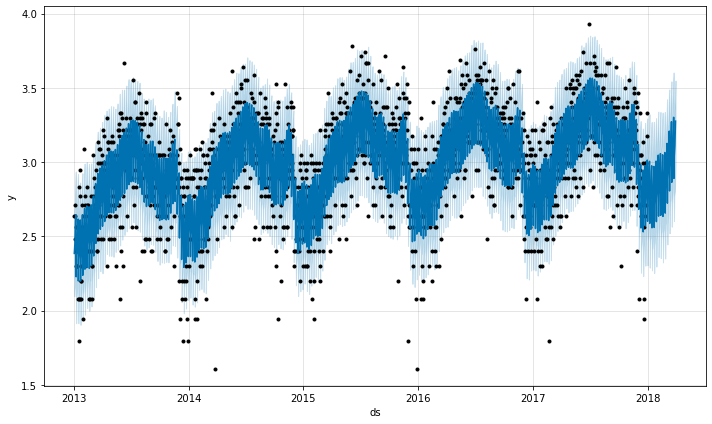

In [7]:
import matplotlib.pyplot as plt

def add_changepoints_to_plot(m, threshold = 0.01, cp_color = "red", cp_linestyle = "dashed", trendd = True, **kwargs):
    layers = []
    if trendd:
        trend_layer = plt.Line2D(m.history['ds'], m.history['b'], color = cp_color, **kwargs)
        layers.append(trend_layer)
    signif_changepoints = m.changepoints[abs(m.params['delta']) >= threshold]
    cp_layer = plt.axvline(x = signif_changepoints, color = cp_color, linestyle = cp_linestyle, **kwargs)
    layers.append(cp_layer)
    return layers

fig = model_prophet.plot(forecast)
# add_changepoints_to_plot(model_prophet)

**Inspecting Model Components:**

Such a bad baseline forecastong on train data.Isn't it!!

Model is completely overfitting and there are so many changing points( Points marked by the RED LINES)  which we need to remove.Let’s inspect the model components:


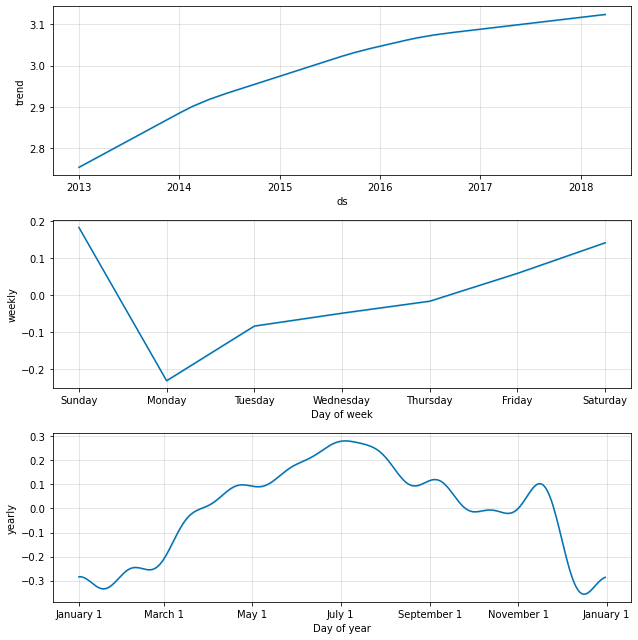

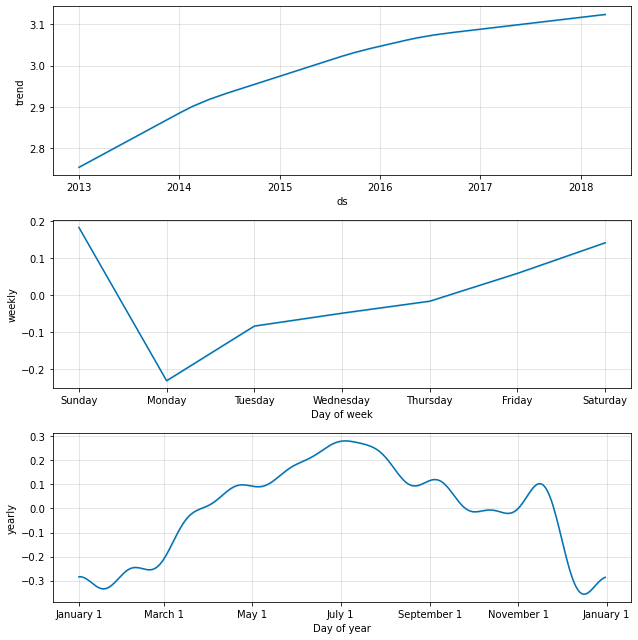

In [8]:
from prophet.plot import plot_components
plot_components(model_prophet, forecast)


** Therefore we can see there is a Drop of Sales from Sunday to Monday. Thefore there MUST be an HOLIDAY effect on our sales data. 
 There is peak in sales in July that means those may the festive times or seasonal sales with high discount prices.
 Let's optimise our Prophet Parameters, try to Exclude Change Points and inlcude Holiday Effects with Additional Regressors.**

<a id="section5.5"></a>
# 5.5. Customizing holidays and events:

 ######Holiday Effects########
If you have holidays or other recurring events that you’d like to model, you must create a dataframe for them. 
It has two columns (holiday and ds) and a row for each occurrence of the holiday.
It must include all occurrences of the holiday, both in the past (back as far as the historical data go) and in the future (out as far as the forecast is being made).
If they won’t repeat in the future, Prophet will model them and then not include them in the forecast.
You can also include columns lower_window and upper_window which extend the holiday out to [lower_window, upper_window] days around the date. For instance, if you wanted to included Christmas Eve in addition to Christmas you’d include lower_window=-1, upper_window=0. If you wanted to use Black Friday in addition to Thanksgiving, you’d include lower_window=0, upper_window=1. 
You can also include a column prior_scale to set the prior scale separately for each holiday, as described below.

There are two types of Holidays:

 1. **Playoffs**: These are the Less-Important public holidays and weekends.
 2. **Superbowls**: These are the Festive Holidays with high importance. There may occurs a high increase or decrease in sales due to these holidays e.g. New Year, Christmas etc.


 I have inlcuded the Holiday Sales in the month of July for different Years in Playoffs.

In [ ]:
playoffs <- data_frame(
  holiday = 'playoff',
  ds = as.Date(c('2013-07-12', '2014-07-12', '2014-07-19',
                 '2014-07-02', '2015-07-11', '2016-07-17',
                 '2016-07-24', '2016-07-07','2016-07-24')),
  lower_window = 0,
  upper_window = 1
)


I have inlcuded the Holiday Sales fofr Festive seasons like New Year & Christmas for different Years in Superbowls.

In [ ]:
superbowls <- data_frame(
  holiday = 'superbowl',
  ds = as.Date(c('2013-01-01', '2013-12-25', '2014-01-01', '2014-12-25','2015-01-01', '2015-12-25','2016-01-01', '2016-12-25',
                '2017-01-01', '2017-12-25')),
  lower_window = 0,
  upper_window = 1
)
holidays <- bind_rows(playoffs, superbowls)

<a id="section5.6"></a>
# 5.6.IncludeFourier Order of Seasonality &  Additional Regressors

Seasonality is estimated using partial Fourier sum which can approximate an arbitrary periodic signal. 
The no of  terms in the partial sum (the order) is a parameter that determines how quickly the seasonality can change. 
Default is 10, but using Bayesian optimisation  with cross validation, I have  taken fourier order=5.
Prophet will by default fit weekly and yearly seasonalities, if the time series is more than two cycles long. 
It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly) using the add_seasonality in R.

The inputs to this function are a name, the period of the seasonality in days, and the Fourier order for the seasonality. 
For reference, by default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality. 
An optional input to add_seasonality is the prior scale for that seasonal component.

Additional regressors can be added to the linear part of the model using the add_regressor method or function. A column with the regressor value will need to be present in both the fitting and prediction dataframes.
I have added an additional effect on Sundays during the NFL season (National Football League ).
The add_regressor function provides a more general interface for defining extra linear regressors, and does not require that the regressor be a binary indicator. Another time series ould be used as a regressor, although its future values would have to be known.
The extra regressor must be known for both the history and for future dates. It thus must either be something that has known future values (such as nfl_sunday), or something that has separately been forecasted elsewhere. Prophet will also raise an error if the regressor is constant throughout the history, since there is nothing to fit from it.
Extra regressors are put in the linear component of the model, so the underlying model is that the time series depends on the extra regressor as either an additive or multiplicative factor (see the next section for multiplicativity).



<a id="section5.7"></a>
# 5.7  Including Additional Regressors e.g. NFL Sundays

In [ ]:
nfl_sunday <- function(ds) {
  dates <- as.Date(ds)
  month <- as.numeric(format(dates, '%m'))
  as.numeric((weekdays(dates) == "Sunday") & (month > 8 | month < 2))
}
stats$nfl_sunday <- nfl_sunday(stats$ds)


model_prophet <- prophet()
model_prophet <- add_regressor(model_prophet, 'nfl_sunday')
model_prophet <- add_seasonality(model_prophet, name='daily', period=60, fourier.order=5)
model_prophet <- prophet(stats, holidays = holidays,holidays.prior.scale = 0.5, yearly.seasonality = 4,
                         interval.width = 0.95,changepoint.prior.scale = 0.006,daily.seasonality = T)
future = make_future_dataframe(model_prophet, periods = 90, freq = 'days')
forecast = predict(model_prophet, future)

In [ ]:
plot(model_prophet, forecast) + add_changepoints_to_plot(model_prophet)
prophet_plot_components(model_prophet, forecast)

Now we can see the model has improved a lot after optimising the prophet parameters and including holidays, seasonality and additional regressors in the data. 
The  trend is NOT much fluctuating like the baseline models and there is NO CHANGE POINTS of sales as well after fitting a better model. 
The model is NOT much overfitting as well. 
  We can colnculde that Holidays has an effect on Sales Price and we have taken care of it in our optimised models.

In [ ]:
predict_store1_item1=data.frame(date=forecast$ds,forecast=expm1(forecast$yhat))
predict_store1_item1$yearmonth=as.yearmon(predict_store1_item1$date)

colnames(predict_store1_item1)<-c("ds","forecast","yearmonth")

<a id="section5.8"></a>
# 5.8.SMAPE CALCULATION

Used to estimate sMAPE

**Symmetric Mean Absolute Percent Error (SMAPE)** is an alternative to Mean Absolute Percent Error (MAPE) when there are zero or near-zero demand for items. SMAPE self-limits to an error rate of 200%, reducing the influence of these low volume items. Low volume items are problematic because they could otherwise have infinitely high error rates that skew the overall error rate.

SMAPE is the forecast minus actuals divided by the sum of forecasts and actuals as expressed in this formula:

<img src="http://www.vanguardsw.com/vg-content/uploads/2017/01/Screen-Shot-2017-01-10-at-3.56.47-PM-copy.png" width=20%>

In [ ]:
smape_cal <- function(outsample, forecasts){
  outsample <- as.numeric(outsample)
  forecasts<-as.numeric(forecasts)
  smape <- (abs(outsample-forecasts))/((abs(outsample)+abs(forecasts))/2)
  return(smape)
}

str(stats)
stats$ds=as.Date(stats$ds)
predict_store1_item1$ds=as.Date(predict_store1_item1$ds)

train_predict=merge(stats,predict_store1_item1,by="ds",all.x=T)
SMAPE_ERR <- smape_cal(outsample=train_predict$y, forecasts=train_predict$forecast)
SMAPE<-mean(SMAPE_ERR,na.rm = T)
sprintf("The value of SMAPE for Store-1 & Item-1 is %f ", SMAPE )

The value of SMAPE for Store-1 & Item-1 is 1.448148 '

<a id="section5.9"></a>
# 5.9. Automation for Prophet: Splitting data by Store and Item

In [32]:
train['Year'] = pd.DatetimeIndex(train['date']).year
train['Month'] = pd.DatetimeIndex(train['date']).month
train.drop(['Year', 'Month'], axis=1, inplace=True)
train['y'] = np.log1p(train['sales'])
# train.columns = ['ds', 'store', 'item', 'y']
train = train.rename(columns={'date':'ds'})

train_splitting = [group[1] for group in train.groupby(['store', 'item'])]

def prediction(df):
    playoffs = pd.DataFrame({
        'holiday': 'playoff',
        'ds': pd.to_datetime(['2013-07-12', '2014-07-12', '2014-07-19', '2014-07-02', '2015-07-11', '2016-07-17', '2016-07-24', '2016-07-07','2016-07-24']),
        'lower_window': 0,
        'upper_window': 1
    })

    superbowls = pd.DataFrame({
        'holiday': 'superbowl',
        'ds': pd.to_datetime(['2013-01-01', '2013-12-25', '2014-01-01', '2014-12-25','2015-01-01', '2015-12-25','2016-01-01', '2016-12-25', '2017-01-01', '2017-12-25']),
        'lower_window': 0,
        'upper_window': 1
    })
    holidays = pd.concat((playoffs, superbowls))
    model_prophet = Prophet()
    model_prophet.add_seasonality(name='daily', period=60, fourier_order=5)
    model_prophet.add_country_holidays(country_name='US')
    model_prophet.fit(df)
    future = model_prophet.make_future_dataframe(periods=90)
    forecast = model_prophet.predict(future)
    forecast_final = forecast[['ds', 'yhat']].tail(90)
    return forecast_final

In [50]:
predict = []
for a in train_splitting:
    b = prediction(a.iloc[:, :])
    predict.append(b)
# prediction_final = pd.DataFrame(predict)

15:46:55 - cmdstanpy - INFO - Chain [1] start processing
15:46:55 - cmdstanpy - INFO - Chain [1] done processing
15:46:57 - cmdstanpy - INFO - Chain [1] start processing
15:46:57 - cmdstanpy - INFO - Chain [1] done processing
15:46:58 - cmdstanpy - INFO - Chain [1] start processing
15:46:59 - cmdstanpy - INFO - Chain [1] done processing
15:47:00 - cmdstanpy - INFO - Chain [1] start processing
15:47:00 - cmdstanpy - INFO - Chain [1] done processing
15:47:01 - cmdstanpy - INFO - Chain [1] start processing
15:47:02 - cmdstanpy - INFO - Chain [1] done processing
15:47:03 - cmdstanpy - INFO - Chain [1] start processing
15:47:03 - cmdstanpy - INFO - Chain [1] done processing
15:47:04 - cmdstanpy - INFO - Chain [1] start processing
15:47:05 - cmdstanpy - INFO - Chain [1] done processing
15:47:06 - cmdstanpy - INFO - Chain [1] start processing
15:47:06 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:08 - cmdstanpy - INFO - Chain [1]

In [ ]:
import pandas as pd
import numpy as np
from math import expm1
from pandas.core.reshape import melt

prediction_final.shape
md = melt(prediction_final)
md.shape
md.columns = ["store", "date", "sales"]
md["sales"] = np.expm1(md["sales"])
md.head()


<a id="section5.10"></a>
# 5.10 Final prediction using Prophet

<img src="https://github.com/uselessskills/auto_ml/blob/master/Prophet_analysis/pngs/final_product.png?raw=true" width="100%">

.**NOTE: HOW TO GET & SUBMIT THE OUTPUT: **



There are 10 STORES and 50 ITEMS. Therefore there are 500 elements in "train_splitting" list. I have ran it for 2 elements.  Ran the whole list to get the full prediction and then ran the below code. You will get the final output for submission. 

In [ ]:
#sub=fread("../input/sample_submission.csv")
#sub$sales=md$sales
#head(sub)
#fwrite(sub,"sub_prophet_v1.csv")

<a id="section5.11"></a>
# 5.11.HOW TO IMPROVE PROPHET MODELS FURTHER #

1. More Optimising the parameters using Bayesian Optimisation.
2. Include Multiplicative Seasonality in the model.
3. Remove the outliers and adjust Trend Flexibility.
4. By defualt Prophet uses LINEAR GROWTH for training the model. But we can use the LOGISTIC GROWTH in case of Multiplicative Seasonality.



<a id="section6"></a>
# 6. PART 2: Forecasting Time Series with Neural Networks: 

<a id="section6.1"></a>
# 6.1. Background

Artificial neural network (ANN) is a widely used pattern-recognition methodology for machine learning. ANN is an  emulation of biological neural network, which is composed of many interconnected neurons. However, it only utilized a very limited set of concepts from its biological counterpart. An ANN could have one or more layer of neurons. They could be fully or partially connected. Each connection between two nodes has a weight, which encapsulate the “knowledge” of the system. By processing existing cases
with inputs and expected outputs, these weights would be adjusted based on differences between actual and expected outputs. Because of the nonlinear fashion of ANN, they could be used in a lot of business applications. 

<img src="https://i.imgur.com/0tpEWj3.png" width=100%>

<img src="https://i.imgur.com/VKSe7EG.png" width=100%>

<img src="https://i.imgur.com/9xti9Ao.png" width=100%>

<img src="https://i.imgur.com/53Xf7tb.png" width=100%>

<img src="https://i.imgur.com/VevpkhG.png" width=100%>

<img src="https://i.imgur.com/9pHnxl1.png" width=100%>

<img src="https://i.imgur.com/GnpPKou.png" width=100%>

# We are going to use nnfor package developed by Nikolaos Kourentzes. 

**NOTE: Added the theoretical background in the Comments section.****

 Currently there are two types of neural network available, both** feed-forward: **

a. **multilayer perceptrons** (use function mlp); 

 b. **extreme learning machines **(use function elm)

In [ ]:
y<-ts(stats$y,frequency=365,start = 2013,end=2017)
head(y)

plot(y)

<a id="section6.2"></a>
# 6.2.Baseline Predcition with 1 Hidden Layer 

Although I have used **MLP(Multi Layer Perceptron) function, for basline prediction I have used a single hidden layer, No differencing, No lags**, to make a simpler model.

 We will add more layers of complicated Network with **Diffrencing order and lags in ELM (Extreme Learning Machines) **

In [ ]:
h <- 90   # We will predict for 90 days sales starting from 01-JAN-2018.
tt <- cbind(c(1:(length(y)+h),rep(0,2*h)))
# Observe that the deterministic trend ends with zeros
#print(tt)

# Fit a network with no differencing, no univariate lags, and fixed deterministic trend
fit1 <- mlp(y,difforder=0,lags=0,xreg=tt,xreg.lags=list(0),xreg.keep=TRUE)


In [ ]:
print(fit1)
plot(fit1)

Therefore we can observe our MLP with single hidden layer. Let's see how the fitted graph looks on our training data of Store -1 & Item-1

This is the basic command to fit an MLP network to a time series. This will attempt to automatically specify autoregressive inputs and any necessary pre-processing of the time series. With the pre-specified arguments it trains 20 networks which are used to produce an ensemble forecast and a single hidden layer with 5 nodes. You can override any of these settings. The output of print is a summary of the fitted network:

# The light red inputs represent the binary dummies used to code seasonality, while the grey ones are autoregressive lags. To produce forecasts you can type:

<a id="section6.3"></a>
#  6.3.Plotting the Forecast & Calculate the MSE (Mean Squared Error)

In [ ]:
plot(forecast(fit1,h=h,xreg=tt))

print("The MSE for Store-1 & Item -1 is")
print(round(fit1$MSE,4))

**MSE  for Store-1 & Item- 1: is 0.0674 (Not bad as of the baseline right)**

<a id="section6.4"></a>
# 6.4. Shifting Input

# Now let us shift the input so that the zeros are in the forecast period

In [ ]:
tt2 <- tt[-(1:h),,drop=FALSE]
plot(forecast(fit1,h=h,xreg=tt2))


 The seasonality is there, **but there is zero trend**, as the inputs suggest. 

Also note that the **mlp modelled multiplicative seasonality on its own**. NNs are cool. 

 <a id="section6.5"></a>
 # 6.5. Outplot & Model Fitting:
  Now let us fit a network on the shifted inputs  I will ask for outplot=1 to see the model fit


In [ ]:
fit2 <- mlp(y,difforder=0,lags=0,xreg=tt2,xreg.lags=list(0),xreg.keep=TRUE,outplot=1)

** This fitted model has taken the Multiplicative seasonality into account.**

In [ ]:
print(fit2)
plot(forecast(fit2,h=h,xreg=tt2))

In [ ]:
# Let's check the MSE.
print(round(fit1$MSE,4))  #0.0671 

You can also let it **choose the number of hidden nodes**. There are various options for that, but all are **computationally expensive**.

<a id="section7"></a>
# 7. Extensions:

**1. Choosing Oprimal No of Hidden Layer based on min(MSE).**

**2. Fitting ELM Feed Forward Network for forecasting.**

**3.  Temporal Hierarchies forecasting**

**4. Automation based on MLP/ ELM NN Forecasting.**

<a id="section8"></a>
# 8. References:

-----------------
**PART 1 : PROPHET**

a.[Facebook Prophet Github](https://github.com/facebook/prophet)

b. [Favebook Prophet Blog](http://research.fb.com/prophet-forecasting-at-scale/)

c. [Prediction using Prophet in Python by Conor](https://www.kaggle.com/conorm97/prediction-using-prophet-with-us-holidays)

d. [Prophet Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/)

---------------------
**PART 2: Forecasting uisng ANN:**

a.[Neural network Forecasting: Theory](http://www.neural-forecasting.com/Downloads/EVIC05_tutorial/EVIC%2705%20Slides%20-%20Forecasting%20with%20Neural%20Networks%20Tutorial%20SFCrone.pdf)

b. [NNFOR Github](https://github.com/trnnick/nnfor)

c. [introduction to Neural Network Forecasting](http://www.neural-forecasting.com/)

Thank you for keeping your patience and come till the end.

Happy Kaggling :) 